“House Prices Dataset”

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    "LotArea": [8450, 9600, np.nan, 9550, 14260, np.nan, 10084, 10382],
    "OverallQual": [7, 6, 7, 7, 8, 5, 6, 7],
    "YearBuilt": [2003, 1976, 2001, 1915, 2000, 1993, np.nan, 1970],
    "TotalBsmtSF": [856, 1262, 920, np.nan, 1145, 796, 1686, np.nan],
    "SalePrice": [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000],
    "GarageType": ["Attchd", "Attchd", np.nan, "Detchd", "Attchd", np.nan, "Attchd", "Attchd"],
    "FireplaceQu": [np.nan, np.nan, "TA", "Gd", "TA", np.nan, "Ex", "Gd"]
}

df = pd.DataFrame(data)

# Save raw dataset (before cleaning)
df.to_csv("house_prices_raw.csv", index=False)

df

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,SalePrice,GarageType,FireplaceQu
0,8450.0,7,2003.0,856.0,208500,Attchd,NaN
1,9600.0,6,1976.0,1262.0,181500,Attchd,NaN
2,NaN,7,2001.0,920.0,223500,NaN,TA
3,9550.0,7,1915.0,NaN,140000,Detchd,Gd
4,14260.0,8,2000.0,1145.0,250000,Attchd,TA
5,NaN,5,1993.0,796.0,143000,NaN,NaN
6,10084.0,6,NaN,1686.0,307000,Attchd,Ex
7,10382.0,7,1970.0,NaN,200000,Attchd,Gd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      6 non-null      float64
 1   OverallQual  8 non-null      int64  
 2   YearBuilt    7 non-null      float64
 3   TotalBsmtSF  6 non-null      float64
 4   SalePrice    8 non-null      int64  
 5   GarageType   6 non-null      object 
 6   FireplaceQu  5 non-null      object 
dtypes: float64(3), int64(2), object(2)
memory usage: 580.0+ bytes


In [4]:
df.isnull().sum()

,0
LotArea,2
OverallQual,0
YearBuilt,1
TotalBsmtSF,2
SalePrice,0
GarageType,2
FireplaceQu,3


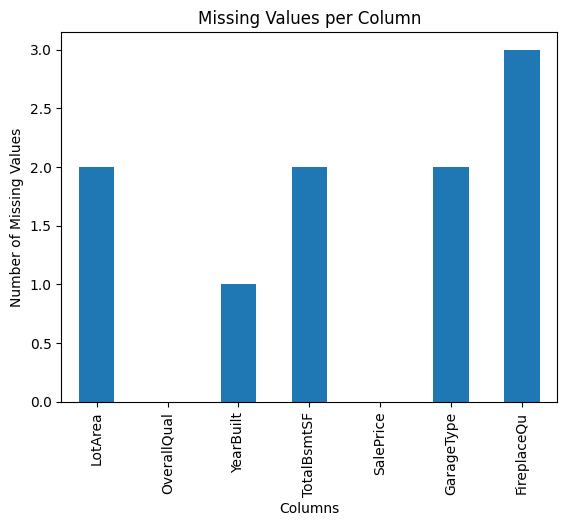

In [5]:
df.isnull().sum().plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

In [6]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Columns:", list(numerical_cols))
print("Categorical Columns:", list(categorical_cols))

Numerical Columns: ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'SalePrice']
Categorical Columns: ['GarageType', 'FireplaceQu']


In [7]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-518003605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1077209983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
threshold = 0.6  # 60% missing allowed
df = df.loc[:, df.isnull().mean() < threshold]

In [10]:
df.isnull().sum()

,0
LotArea,0
OverallQual,0
YearBuilt,0
TotalBsmtSF,0
SalePrice,0
GarageType,0
FireplaceQu,0


In [11]:
raw_df = pd.read_csv("house_prices_raw.csv")

print("Before Cleaning Shape:", raw_df.shape)
print("After Cleaning Shape:", df.shape)

Before Cleaning Shape: (8, 7)
After Cleaning Shape: (8, 7)


In [12]:
df.to_csv("house_prices_cleaned.csv", index=False)

In [13]:
df.head()

,LotArea,OverallQual,YearBuilt,TotalBsmtSF,SalePrice,GarageType,FireplaceQu
0,8450.0,7,2003.0,856.0,208500,Attchd,Gd
1,9600.0,6,1976.0,1262.0,181500,Attchd,Gd
2,9842.0,7,2001.0,920.0,223500,Attchd,TA
3,9550.0,7,1915.0,1032.5,140000,Detchd,Gd
4,14260.0,8,2000.0,1145.0,250000,Attchd,TA
